In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np
from scipy.interpolate import make_interp_spline
import glob

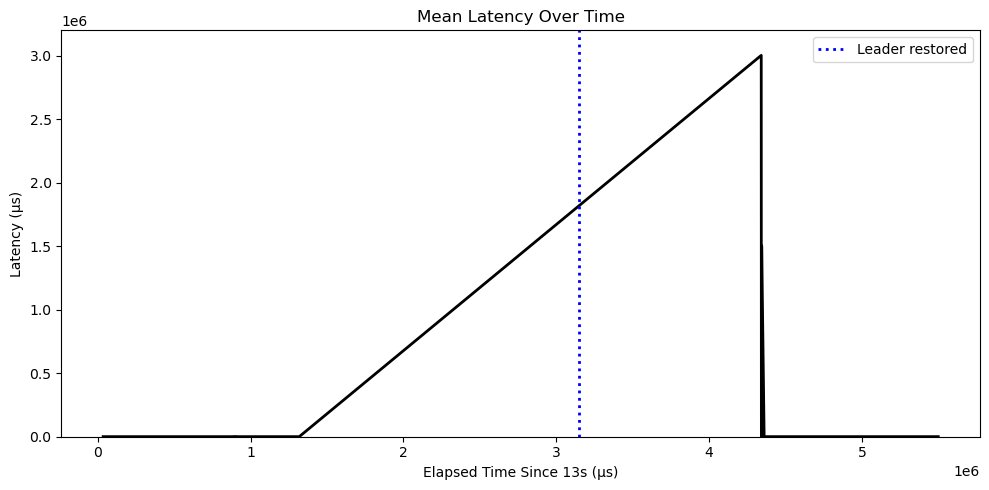

In [227]:
df = pd.read_csv("leader_kill_write.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
start_time = df["Timestamp"].min()
df["Elapsed_us"] = (df["Timestamp"] - start_time).dt.total_seconds() * 1e6
bin_width_us = 1000
df["Elapsed_bin_us"] = (df["Elapsed_us"] // bin_width_us) * bin_width_us
mean_latency = df.groupby("Elapsed_bin_us")["Latency_us"].mean().reset_index()

x_start = 12e6
x_end = 17.5e6

plot_data = mean_latency[(mean_latency["Elapsed_bin_us"] >= x_start) & (mean_latency["Elapsed_bin_us"] <= x_end)].copy()
plot_data["Elapsed_relative_us"] = plot_data["Elapsed_bin_us"] - x_start




plt.figure(figsize=(10, 5))
plt.plot(plot_data["Elapsed_relative_us"], plot_data["Latency_us"], color='black', linewidth=2)

#plt.axvline(x=1.2e6, color='red', linestyle='dotted', linewidth=2, label='Leader Killed')
plt.axvline(x=3.15e6, color='blue', linestyle='dotted', linewidth=2, label='Leader restored')

plt.xlabel("Elapsed Time Since 13s (µs)")
plt.ylabel("Latency (µs)")
plt.title("Mean Latency Over Time")
plt.ylim(0, 3200000)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

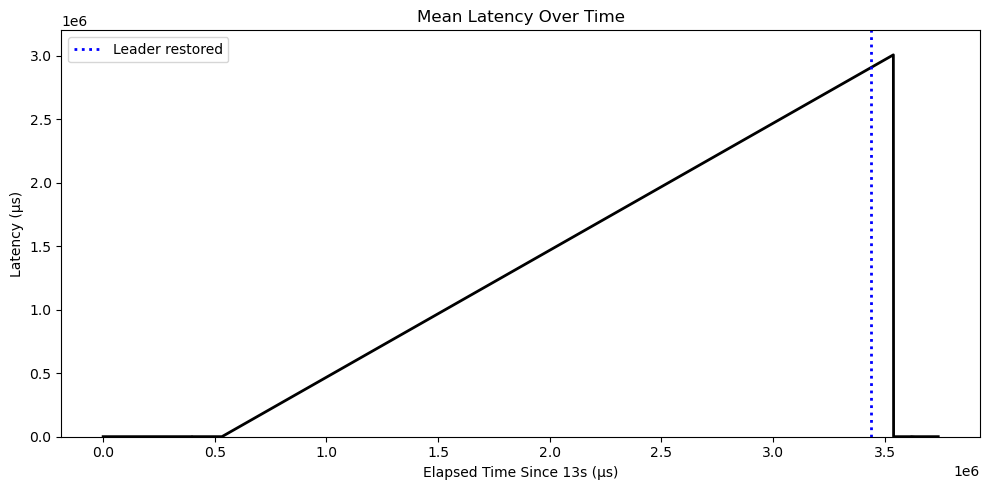

In [228]:
df = pd.read_csv("leader_kill_read.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
start_time = df["Timestamp"].min()
df["Elapsed_us"] = (df["Timestamp"] - start_time).dt.total_seconds() * 1e6


bin_width_us = 1000
df["Elapsed_bin_us"] = (df["Elapsed_us"] // bin_width_us) * bin_width_us
mean_latency = df.groupby("Elapsed_bin_us")["Latency_us"].mean().reset_index()

x_start = 5.66e6
x_end = 9.4e6

plot_data = mean_latency[(mean_latency["Elapsed_bin_us"] >= x_start) & (mean_latency["Elapsed_bin_us"] <= x_end)].copy()
plot_data["Elapsed_relative_us"] = plot_data["Elapsed_bin_us"] - x_start


plt.figure(figsize=(10, 5))
plt.plot(plot_data["Elapsed_relative_us"], plot_data["Latency_us"], color='black', linewidth=2)

#plt.axvline(x=0.48e6, color='red', linestyle='dotted', linewidth=2, label='Leader Killed')
plt.axvline(x=3.44e6, color='blue', linestyle='dotted', linewidth=2, label='Leader restored')


plt.xlabel("Elapsed Time Since 13s (µs)")
plt.ylabel("Latency (µs)")
plt.title("Mean Latency Over Time")
plt.ylim(0, 3200000)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()


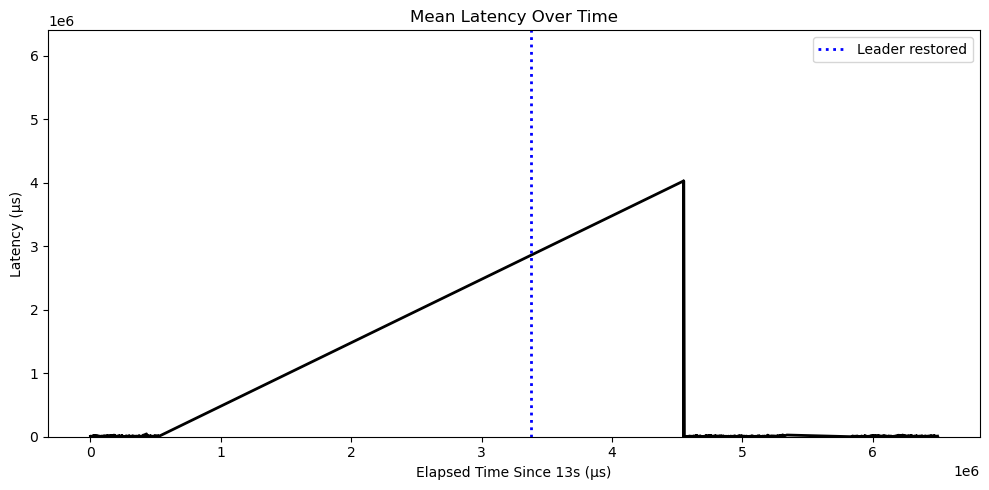

In [229]:
df = pd.read_csv("leader_kill_mixed.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
start_time = df["Timestamp"].min()
df["Elapsed_us"] = (df["Timestamp"] - start_time).dt.total_seconds() * 1e6

bin_width_us = 10
df["Elapsed_bin_us"] = (df["Elapsed_us"] // bin_width_us) * bin_width_us
mean_latency = df.groupby("Elapsed_bin_us")["Latency_us"].mean().reset_index()

x_start = 8.5e6
x_end = 15e6

plot_data = mean_latency[(mean_latency["Elapsed_bin_us"] >= x_start) & (mean_latency["Elapsed_bin_us"] <= x_end)].copy()
plot_data["Elapsed_relative_us"] = plot_data["Elapsed_bin_us"] - x_start

plt.figure(figsize=(10, 5))
plt.plot(plot_data["Elapsed_relative_us"], plot_data["Latency_us"], color='black', linewidth=2)

#plt.axvline(x=0.442e6, color='red', linestyle='dotted', linewidth=2, label='Leader Killed')
plt.axvline(x=3.38e6, color='blue', linestyle='dotted', linewidth=2, label='Leader restored')
plt.xlabel("Elapsed Time Since 13s (µs)")
plt.ylabel("Latency (µs)")
plt.title("Mean Latency Over Time")
plt.ylim(0, 6400000)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()


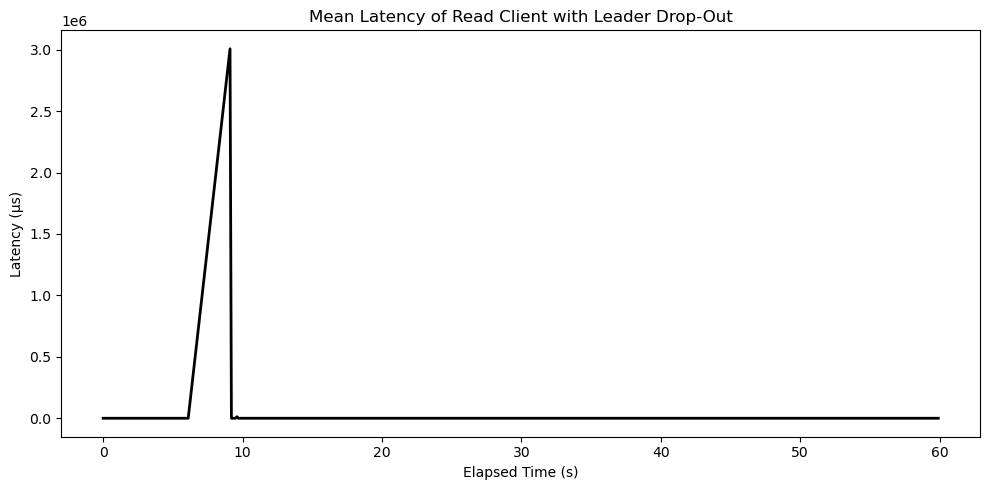

In [230]:
df = pd.read_csv("leader_kill_read.csv")

df["Timestamp"] = pd.to_datetime(df["Timestamp"])
start_time = df["Timestamp"].min()
df["Elapsed_s"] = (df["Timestamp"] - start_time).dt.total_seconds()

bin_width = .1 
df["Elapsed_bin"] = (df["Elapsed_s"] // bin_width) * bin_width
mean_latency = df.groupby("Elapsed_bin")["Latency_us"].mean().reset_index()


plt.figure(figsize=(10, 5))
plt.plot(mean_latency["Elapsed_bin"], mean_latency["Latency_us"], color='black', linewidth=2)

plt.xlabel("Elapsed Time (s)")
plt.ylabel("Latency (µs)")
plt.title("Mean Latency of Read Client with Leader Drop-Out")
plt.grid(False)
plt.tight_layout()
plt.show()


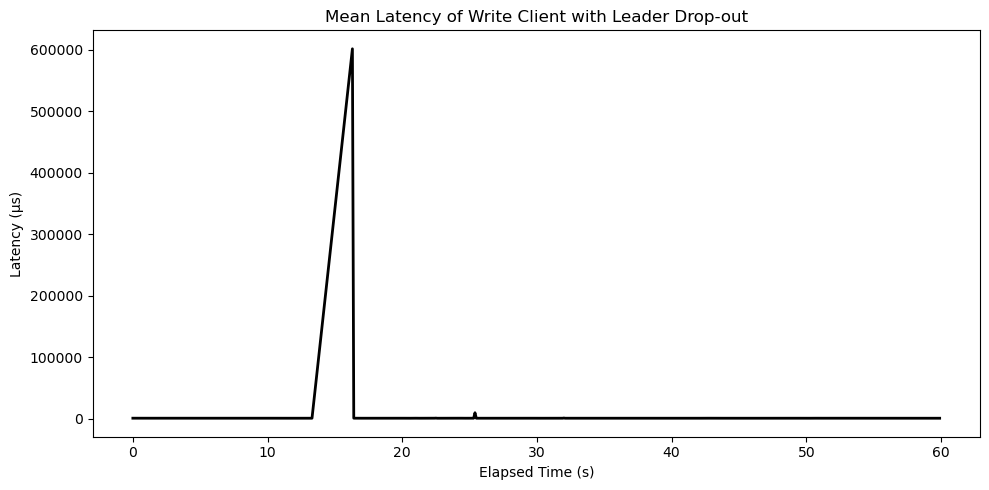

In [231]:
df = pd.read_csv("leader_kill_write.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
start_time = df["Timestamp"].min()
df["Elapsed_s"] = (df["Timestamp"] - start_time).dt.total_seconds()

bin_width = .1 
df["Elapsed_bin"] = (df["Elapsed_s"] // bin_width) * bin_width
mean_latency = df.groupby("Elapsed_bin")["Latency_us"].mean().reset_index()

# Plot only the mean latency line
plt.figure(figsize=(10, 5))
plt.plot(mean_latency["Elapsed_bin"], mean_latency["Latency_us"], color='black', linewidth=2)

# Final plot settings
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Latency (µs)")
plt.title("Mean Latency of Write Client with Leader Drop-out")
plt.grid(False)
plt.tight_layout()
plt.show()


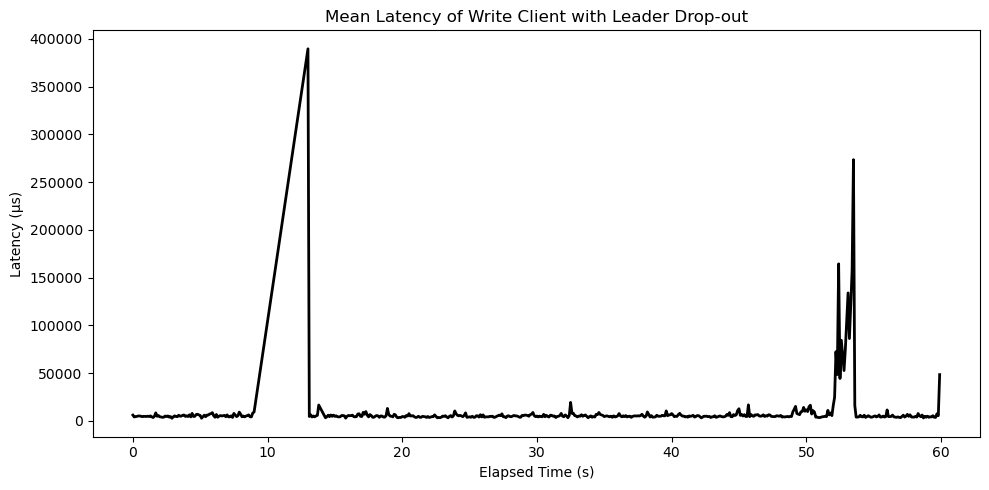

In [232]:
df = pd.read_csv("leader_kill_mixed.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
start_time = df["Timestamp"].min()
df["Elapsed_s"] = (df["Timestamp"] - start_time).dt.total_seconds()

bin_width = .1
df["Elapsed_bin"] = (df["Elapsed_s"] // bin_width) * bin_width
mean_latency = df.groupby("Elapsed_bin")["Latency_us"].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(mean_latency["Elapsed_bin"], mean_latency["Latency_us"], color='black', linewidth=2)

plt.xlabel("Elapsed Time (s)")
plt.ylabel("Latency (µs)")
plt.title("Mean Latency of Write Client with Leader Drop-out")
plt.grid(False)
plt.tight_layout()
plt.show()

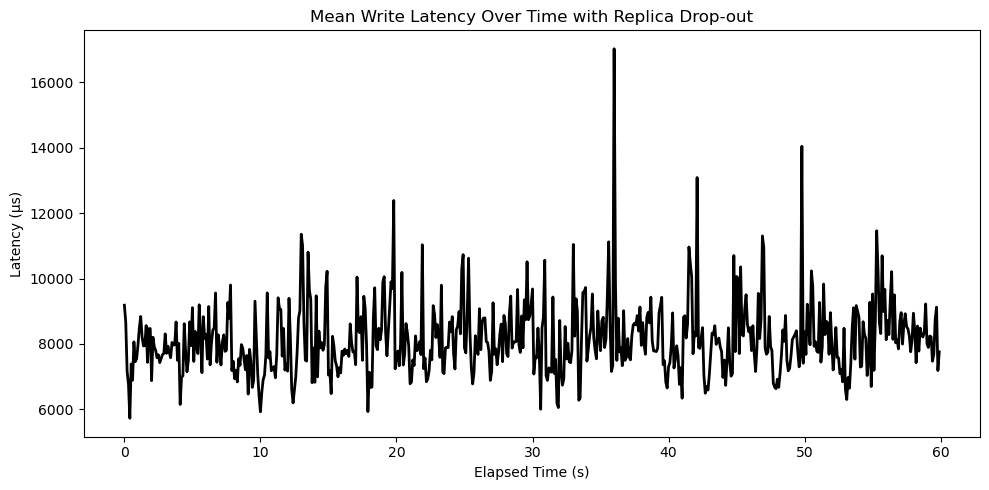

In [233]:
df = pd.read_csv("non_leader_fail_test_write.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
start_time = df["Timestamp"].min()
df["Elapsed_s"] = (df["Timestamp"] - start_time).dt.total_seconds()

bin_width = .1 
df["Elapsed_bin"] = (df["Elapsed_s"] // bin_width) * bin_width
mean_latency = df.groupby("Elapsed_bin")["Latency_us"].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(mean_latency["Elapsed_bin"], mean_latency["Latency_us"], color='black', linewidth=2)
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Latency (µs)")
plt.title("Mean Write Latency Over Time with Replica Drop-out")
plt.grid(False)
plt.tight_layout()
plt.show()

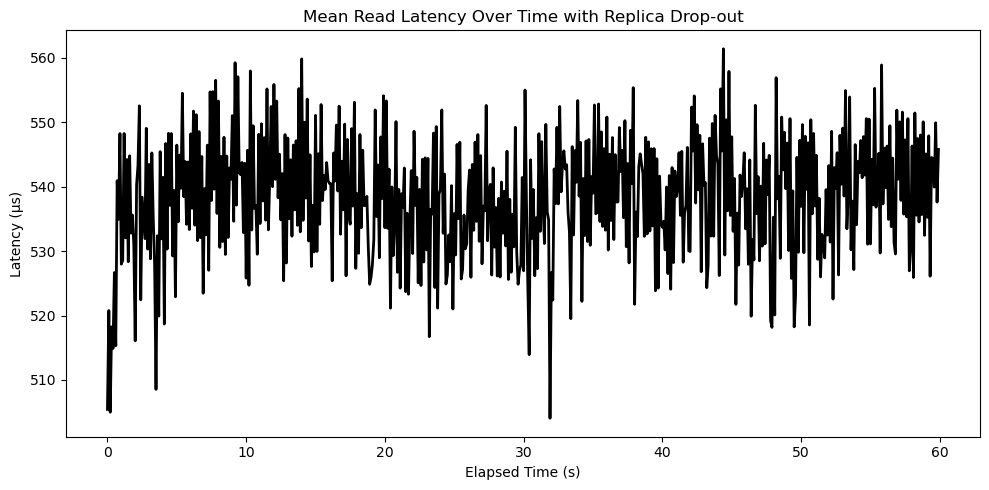

In [234]:
df = pd.read_csv("non_leader_fail_test_read.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
start_time = df["Timestamp"].min()
df["Elapsed_s"] = (df["Timestamp"] - start_time).dt.total_seconds()

bin_width = .1
df["Elapsed_bin"] = (df["Elapsed_s"] // bin_width) * bin_width
mean_latency = df.groupby("Elapsed_bin")["Latency_us"].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(mean_latency["Elapsed_bin"], mean_latency["Latency_us"], color='black', linewidth=2)

plt.xlabel("Elapsed Time (s)")
plt.ylabel("Latency (µs)")
plt.title("Mean Read Latency Over Time with Replica Drop-out")
plt.grid(False)
plt.tight_layout()
plt.show()

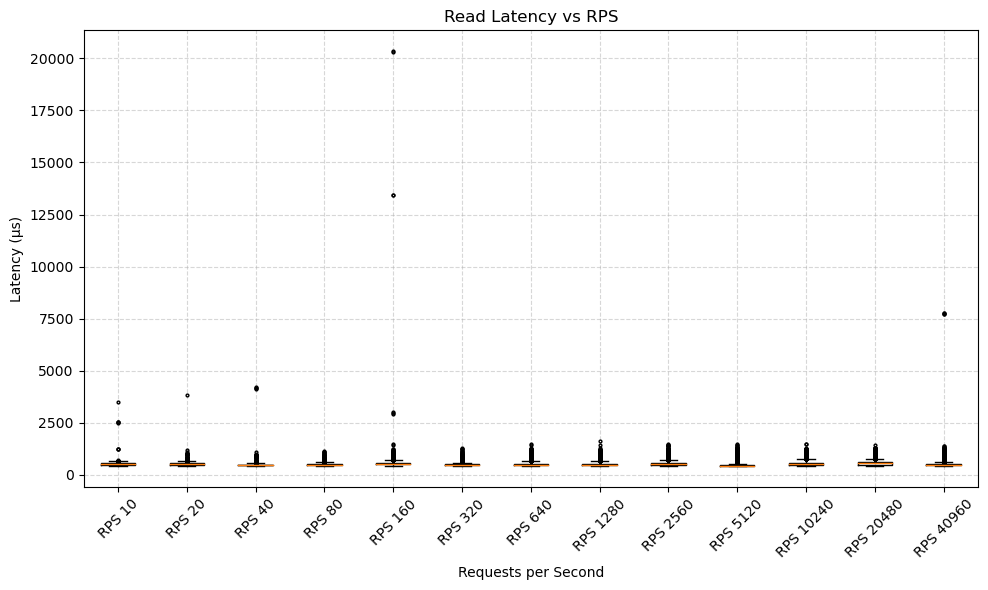

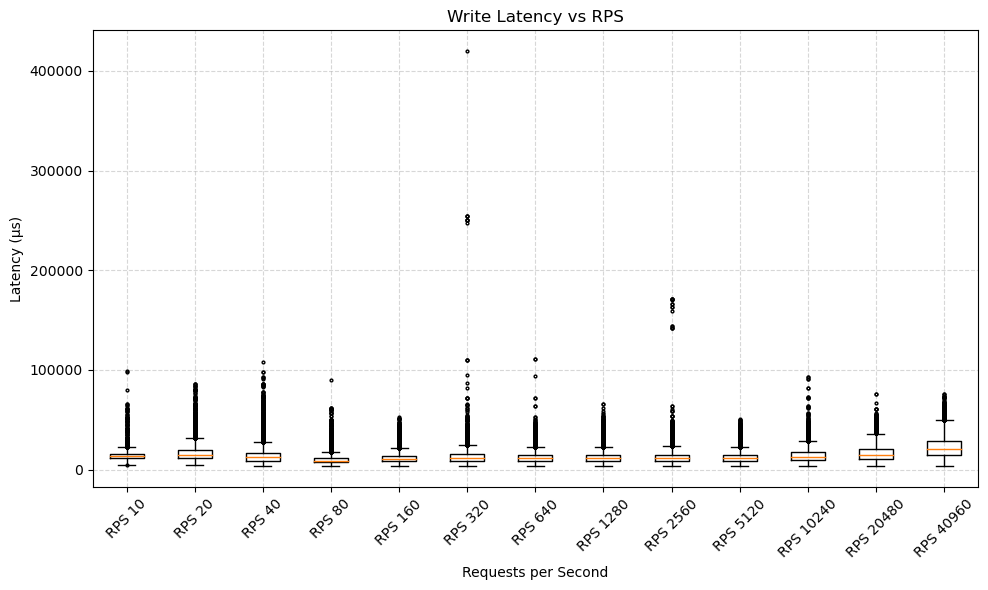

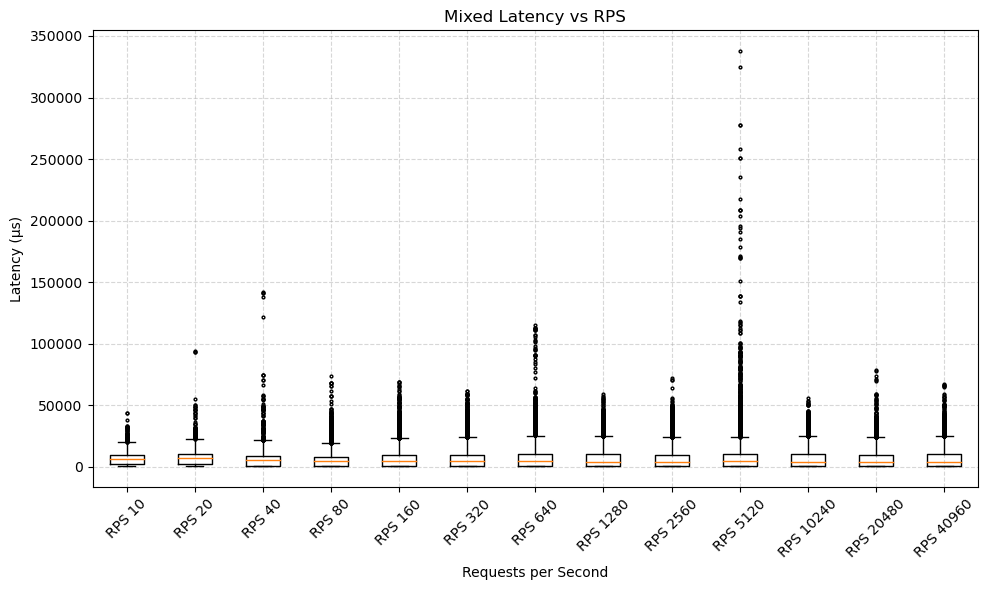

In [235]:
csv_dir = "./logs/"

file_groups = {
    'read': [],
    'write': [],
    'mixed': []
}

for fname in os.listdir(csv_dir):
    if fname.endswith(".csv"):
        for op in file_groups:
            if fname.startswith(f"{op}_rps"):
                file_groups[op].append(fname)
def sort_key(filename):
    match = re.search(r"rps(\d+)", filename)
    return int(match.group(1)) if match else 0

for op_type, files in file_groups.items():
    files.sort(key=sort_key)

    data = []
    labels = []

    for f in files:
        df = pd.read_csv(os.path.join(csv_dir, f))
        if 'Latency_us' not in df.columns:
            continue
        data.append(df["Latency_us"])
        rps = re.search(r"rps(\d+)", f).group(1)
        labels.append(f"RPS {rps}")

    if data:
        plt.figure(figsize=(10, 6))
        plt.boxplot(data, labels=labels, flierprops=dict(marker='o', markersize=2, linestyle='none'))
        plt.title(f"{op_type.capitalize()} Latency vs RPS")
        plt.ylabel("Latency (µs)")
        plt.xlabel("Requests per Second")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


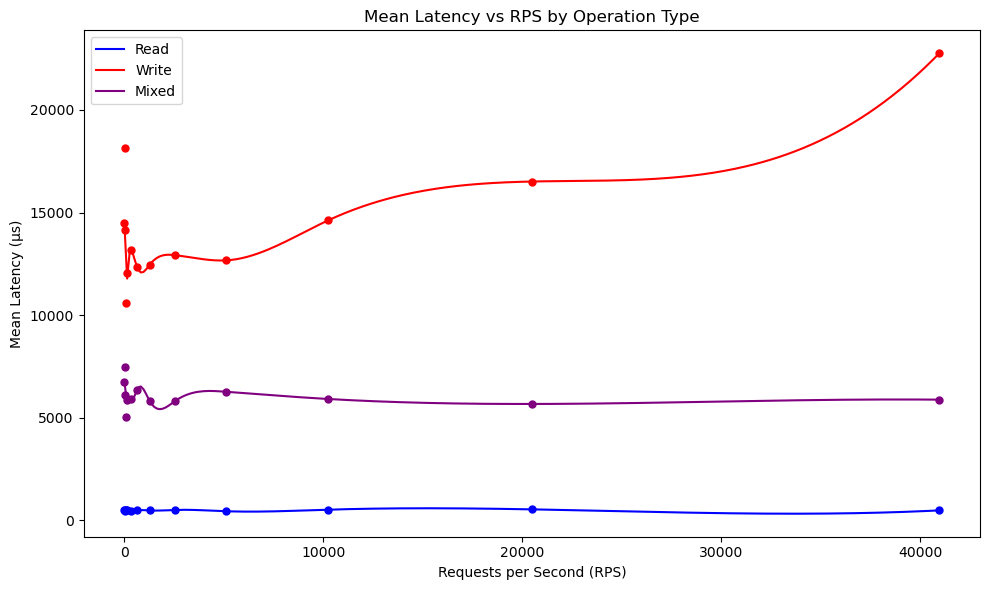

In [236]:
csv_dir = "./logs/"
file_groups = {'read': [], 'write': [], 'mixed': []}
for fname in os.listdir(csv_dir):
    if fname.endswith(".csv"):
        for op in file_groups:
            if fname.startswith(f"{op}_rps"):
                file_groups[op].append(fname)

def sort_key(fname):
    m = re.search(r"rps(\d+)", fname)
    return int(m.group(1)) if m else 0

plt.figure(figsize=(10, 6))
colors = {'read': 'blue', 'write': 'red', 'mixed': 'purple'}

for op_type, files in file_groups.items():
    files.sort(key=sort_key)
    rps_values = []
    mean_latencies = []

    for f in files:
        match = re.search(r"rps(\d+)", f)
        if not match:
            continue
        rps = int(match.group(1))
        df = pd.read_csv(os.path.join(csv_dir, f))
        if 'Latency_us' not in df.columns:
            continue
        mean_latency = df["Latency_us"].mean()
        rps_values.append(rps)
        mean_latencies.append(mean_latency)

    if rps_values and mean_latencies:
        rps_values, mean_latencies = zip(*sorted(zip(rps_values, mean_latencies)))

        rps_arr = np.array(rps_values)
        latency_arr = np.array(mean_latencies)
        if len(rps_arr) >= 4:
            x_smooth = np.linspace(rps_arr.min(), rps_arr.max(), 300)
            spline = make_interp_spline(rps_arr, latency_arr, k=3)
            y_smooth = spline(x_smooth)
            plt.plot(x_smooth, y_smooth, label=f"{op_type.capitalize()}", color=colors[op_type])
        else:
            plt.plot(rps_arr, latency_arr, label=f"{op_type.capitalize()}", color=colors[op_type])

        plt.scatter(rps_values, mean_latencies, color=colors[op_type], s=25)

plt.xlabel("Requests per Second (RPS)")
plt.ylabel("Mean Latency (µs)")
plt.title("Mean Latency vs RPS by Operation Type")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

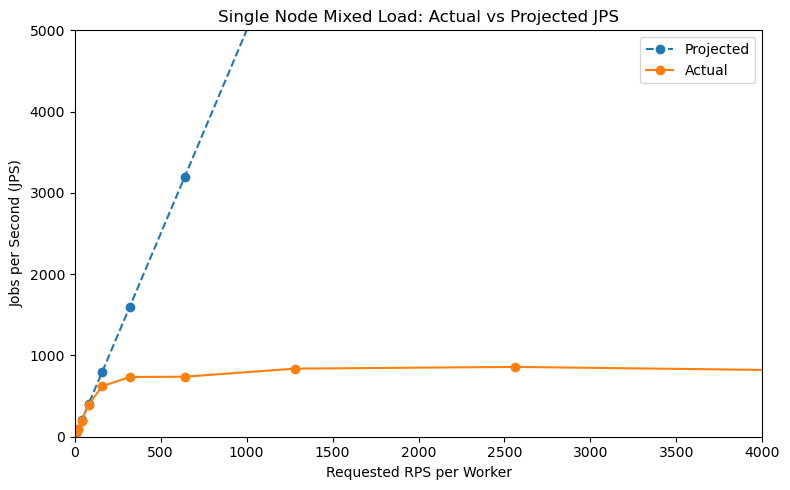

In [237]:
df = pd.read_csv("Single_Stress.csv", sep=",")
duration_s = 60

df["Projected_JPS"] = df["RPS"] * 5
df["Actual_JPS"] = (df["Mean Success"] / duration_s) * 5

df_mixed = df[df["Type"] == "Mixed"]

plt.figure(figsize=(8, 5))
plt.plot(df_mixed["RPS"], df_mixed["Projected_JPS"], label="Projected", linestyle='--', marker='o')
plt.plot(df_mixed["RPS"], df_mixed["Actual_JPS"], label="Actual", marker='o')
plt.xlabel("Requested RPS per Worker")
plt.ylabel("Jobs per Second (JPS)")
plt.title("Single Node Mixed Load: Actual vs Projected JPS")
plt.xlim(0, 4000)
plt.ylim(0, 5000)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


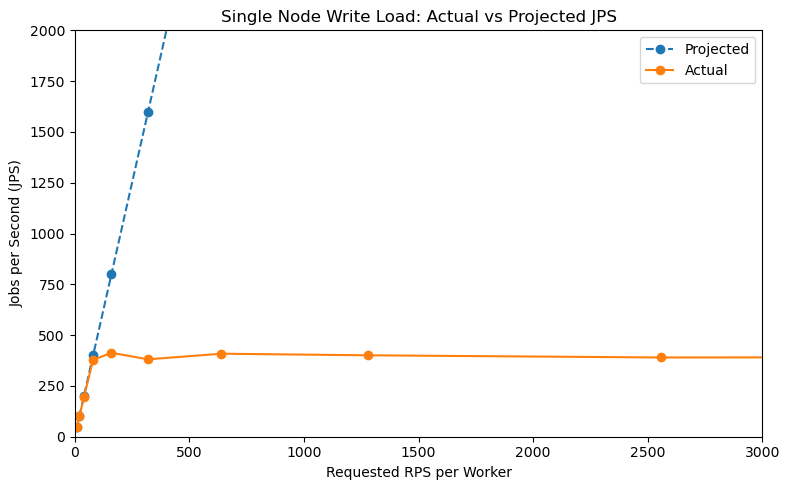

In [238]:
df = pd.read_csv("Single_Stress.csv", sep=",")
duration_s = 60

df["Projected_JPS"] = df["RPS"] * 5
df["Actual_JPS"] = (df["Mean Success"] / duration_s) * 5

df_mixed = df[df["Type"] == "Write"]

plt.figure(figsize=(8, 5))
plt.plot(df_mixed["RPS"], df_mixed["Projected_JPS"], label="Projected", linestyle='--', marker='o')
plt.plot(df_mixed["RPS"], df_mixed["Actual_JPS"], label="Actual", marker='o')
plt.xlabel("Requested RPS per Worker")
plt.ylabel("Jobs per Second (JPS)")
plt.title("Single Node Write Load: Actual vs Projected JPS")
plt.xlim(0, 3000)
plt.ylim(0, 2000)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


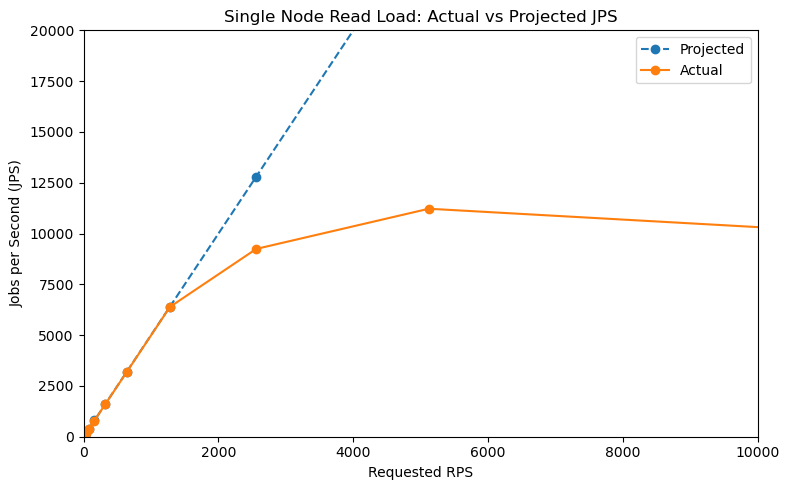

In [239]:
df = pd.read_csv("Single_Stress.csv", sep=",")
duration_s = 60

df["Projected_JPS"] = df["RPS"] * 5
df["Actual_JPS"] = (df["Mean Success"] / duration_s) * 5

df_mixed = df[df["Type"] == "Read"]

plt.figure(figsize=(8, 5))
plt.plot(df_mixed["RPS"], df_mixed["Projected_JPS"], label="Projected", linestyle='--', marker='o')
plt.plot(df_mixed["RPS"], df_mixed["Actual_JPS"], label="Actual", marker='o')
plt.xlabel("Requested RPS")
plt.ylabel("Jobs per Second (JPS)")
plt.title("Single Node Read Load: Actual vs Projected JPS")
plt.xlim(0, 10000)
plt.ylim(0, 20000)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


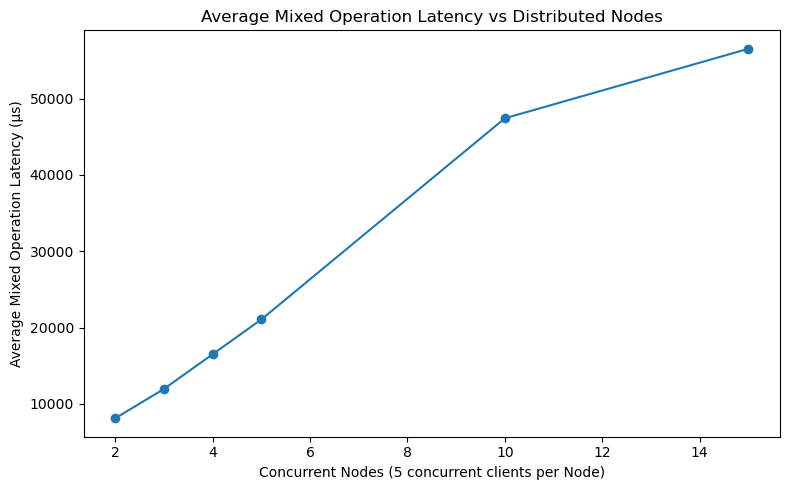

In [240]:
folder = "manual_multi"
files = [
    "2_client_concurrent.csv", "3_client_concurrent.csv", "4_client_concurrent.csv",
    "5_client_concurrent.csv", "10_client_concurrent.csv", "15_client_concurrent.csv"
]

client_counts = []
avg_latencies = []

for file in files:
    filepath = os.path.join(folder, file)
    df = pd.read_csv(filepath)

    if df.shape[1] < 2:
        continue

    client_num = int(re.match(r"(\d+)_client", file).group(1))
    success_rows = df[df.iloc[:, -1] == True]

    avg_latency = success_rows["Latency_us"].mean()

    client_counts.append(client_num)
    avg_latencies.append(avg_latency)


sorted_idx = sorted(range(len(client_counts)), key=lambda i: client_counts[i])
client_counts = [client_counts[i] for i in sorted_idx]
avg_latencies = [avg_latencies[i] for i in sorted_idx]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(client_counts, avg_latencies, marker='o')
plt.xlabel("Concurrent Nodes (5 concurrent clients per Node)")
plt.ylabel("Average Mixed Operation Latency (µs)")
plt.title("Average Mixed Operation Latency vs Distributed Nodes")
plt.grid(False)
plt.tight_layout()
plt.show()


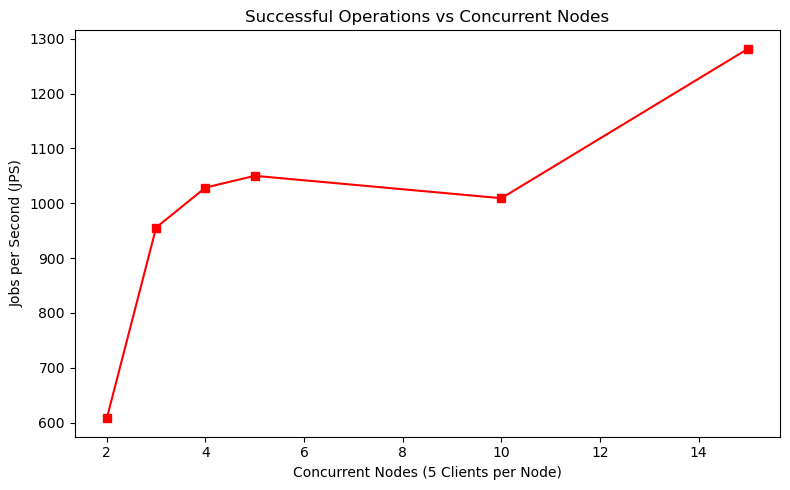

In [241]:
folder = "manual_multi"
files = [
    "2_client_concurrent.csv", "3_client_concurrent.csv", "4_client_concurrent.csv",
    "5_client_concurrent.csv", "10_client_concurrent.csv", "15_client_concurrent.csv"
]

client_counts = []
success_counts = []

for file in files:
    filepath = os.path.join(folder, file)
    df = pd.read_csv(filepath)

    if df.shape[1] < 2:
        continue

    client_num = int(re.match(r"(\d+)_client", file).group(1))
    success_rows = df[df.iloc[:, -1] == True]

    success_metric = len(success_rows) / 120

    client_counts.append(client_num)
    success_counts.append(success_metric)

sorted_idx = sorted(range(len(client_counts)), key=lambda i: client_counts[i])
client_counts = [client_counts[i] for i in sorted_idx]
success_counts = [success_counts[i] for i in sorted_idx]

plt.figure(figsize=(8, 5))
plt.plot(client_counts, success_counts, marker='s', color='red')
plt.xlabel("Concurrent Nodes (5 Clients per Node)")
plt.ylabel("Jobs per Second (JPS)")
plt.title("Successful Operations vs Concurrent Nodes")
plt.grid(False)
plt.tight_layout()
plt.show()


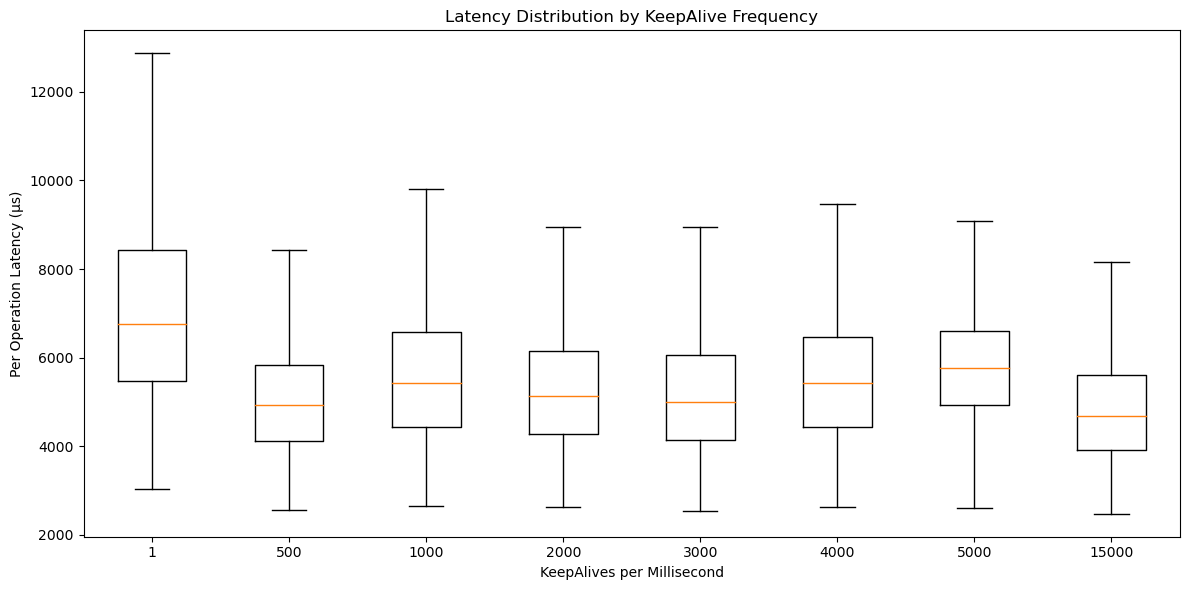

In [242]:
sv_files = glob.glob("lease_logs/*.csv")
csv_files = sorted(csv_files, key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

latency_data = []
labels = []

for file in csv_files:
    df = pd.read_csv(file)
    if "Latency_us" not in df.columns:
        raise ValueError(f"'Latency_us' column not found in {file}")
    latency_data.append(df["Latency_us"])
    labels.append(os.path.splitext(os.path.basename(file))[0]) 

plt.figure(figsize=(12, 6))
plt.boxplot(latency_data, labels=labels, showfliers=False)
plt.xlabel("KeepAlives per Millisecond")
plt.ylabel("Per Operation Latency (µs)")
plt.title("Latency Distribution by KeepAlive Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()


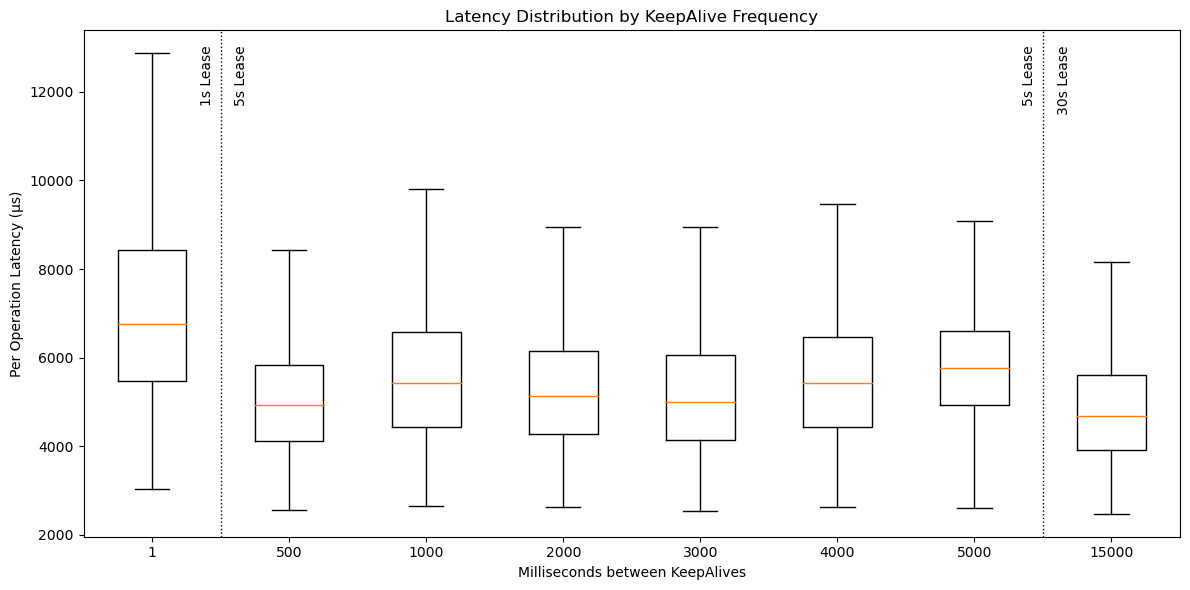

In [243]:
csv_files = glob.glob("lease_logs/*.csv")

csv_files = sorted(csv_files, key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

latency_data = []
labels = []

for file in csv_files:
    df = pd.read_csv(file)
    if "Latency_us" not in df.columns:
        raise ValueError(f"'Latency_us' column not found in {file}")
    
    last_col = df.columns[-1]
    df = df[df[last_col] == True]

    latency_data.append(df["Latency_us"])
    labels.append(os.path.splitext(os.path.basename(file))[0])



plt.figure(figsize=(12, 6))
plt.boxplot(latency_data, labels=labels, showfliers=False)
plt.xlabel("Milliseconds between KeepAlives")
plt.ylabel("Per Operation Latency (µs)")
plt.title("Latency Distribution by KeepAlive Frequency")
plt.grid(False)

plt.axvline(x=1.5, linestyle='dotted', color='black', linewidth=1)
plt.text(1.5 - 0.15, plt.ylim()[1] * 0.975, "1s Lease", color='black', rotation=90, va='top')
plt.text(1.5 + 0.1, plt.ylim()[1] * 0.975, "5s Lease", color='black', rotation=90, va='top')

plt.axvline(x=7.5, linestyle='dotted', color='black', linewidth=1)
plt.text(7.5 - 0.15, plt.ylim()[1] * 0.975, "5s Lease", color='black', rotation=90, va='top')
plt.text(7.5 + 0.1, plt.ylim()[1] * 0.975, "30s Lease", color='black', rotation=90, va='top')

plt.tight_layout()


plt.show()